# Ejemplo de diferencias finitas para el instituto Sábato

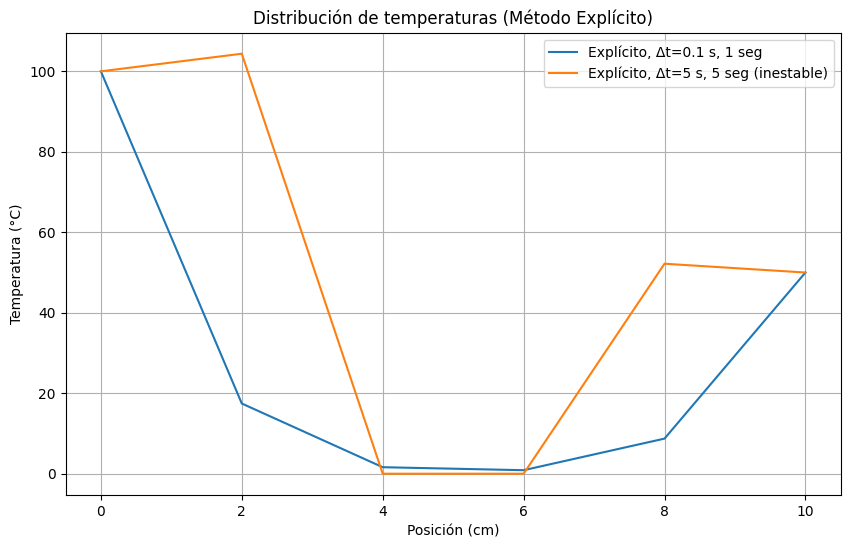

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 10  # cm (longitud de la barra)
k = 0.835  # cm^2/s (difusividad térmica)
dx = 2  # cm (incremento espacial)
dt_1 = 0.1  # s (incremento temporal 1)
dt_2 = 5  # s (incremento temporal 2)
T_left = 100  # °C (temperatura en el extremo izquierdo)
T_right = 50  # °C (temperatura en el extremo derecho)
T_initial = 0  # °C (condición inicial)
n_points = int(L / dx) + 1  # Número de nodos (incluye extremos)
Fo_1 = k * dt_1 / dx**2
Fo_2 = k * dt_2 / dx**2

# Función para método explícito
def metodo_explicito(T, Fo, timesteps):
    for _ in range(timesteps):
        T_new = T.copy()
        for i in range(1, len(T) - 1):  # Actualizar nodos internos
            T_new[i] = T[i] + Fo * (T[i - 1] - 2 * T[i] + T[i + 1])
        T = T_new
    return T

# Configuración inicial
T_1 = np.zeros(n_points)  # Distribución inicial para dt=0.1 s
T_2 = np.zeros(n_points)  # Distribución inicial para dt=5 s
T_1[0], T_1[-1] = T_left, T_right  # Condiciones de contorno
T_2[0], T_2[-1] = T_left, T_right

# Cálculos explícitos
timesteps_1 = 10  # 1 segundo total (para dt=0.1 s)
timesteps_2 = 1  # 5 segundos total (para dt=5 s)
T_result_1 = metodo_explicito(T_1, Fo_1, timesteps_1)
T_result_2 = metodo_explicito(T_2, Fo_2, timesteps_2)

# Visualización de resultados
x = np.linspace(0, L, n_points)
plt.figure(figsize=(10, 6))
plt.plot(x, T_result_1, label="Explícito, Δt=0.1 s, 1 seg")
plt.plot(x, T_result_2, label="Explícito, Δt=5 s, 5 seg (inestable)")
plt.title("Distribución de temperaturas (Método Explícito)")
plt.xlabel("Posición (cm)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid()
plt.show()
